<a href="https://colab.research.google.com/github/WhyPtyo/17_Analisis-Kestabilan-Pangan/blob/main/17_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Data Wrangling:
# INTEGRASI DATA PRODUKSI, KONSUMSI, HARGA BAHAN PANGAN, EKSPOR, DAN IMPOR TAHUN 2021-2024 UNTUK MENGATASI KESTABILAN PANGAN DI INDONESIA

---

Kelas : 2024D

Disusun oleh : Kelompok 17

Wahyu Prasetyono		(24031554133)

Maris Al Sabina Azzuhra	(24031554188)


# 1. Teknik Pengambilan dan Integrasi Data

In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import json
import warnings
import folium


warnings.filterwarnings('ignore')
# konfigurasi file
files = {
    #Sumber BPS = Padi "https://www.bps.go.id/id/statistics-table/2/MTQ5OCMy/luas-panen-produksi-dan-produktivitas-padi-menurut-provinsi.html"
    'produksi': {
        'padi': {
            2021: 'Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2021.csv',
            2022: 'Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2022.csv',
            2023: 'Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2023.csv',
            2024: 'Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024.csv'
            },
        'jagung': {
            2021: 'Luas Panen, Produksi, dan Produktivitas Jagung Menurut Provinsi, 2021.csv',
            2022: 'Luas Panen, Produksi, dan Produktivitas Jagung Menurut Provinsi, 2022.csv',
            2023: 'Luas Panen, Produksi, dan Produktivitas Jagung Menurut Provinsi, 2023.csv',
            2024: 'Luas Panen, Produksi, dan Produktivitas Jagung Menurut Provinsi, 2024.csv'
        },
        'daging_sapi': {
            2021: 'Produksi Daging Sapi menurut Provinsi, 2021.csv',
            2022: 'Produksi Daging Sapi menurut Provinsi, 2022.csv',
            2023: 'Produksi Daging Sapi menurut Provinsi, 2023.csv',
            2024: 'Produksi Daging Sapi menurut Provinsi, 2024.csv'
        },
        'sayuran': {
            2021: 'Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman, 2021.csv',
            2022: 'Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman, 2022.csv',
            2023: 'Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman, 2023.csv',
            2024: 'Produksi Tanaman Sayuran dan Buah–Buahan Semusim Menurut Jenis Tanaman, 2024.csv'
        },
    },
    'penduduk': {
        #Sumber BPS = https://www.bps.go.id/id/statistics-table/3/V1ZSbFRUY3lTbFpEYTNsVWNGcDZjek53YkhsNFFUMDkjMw==/penduduk--laju-pertumbuhan-penduduk--distribusi-persentase-penduduk--kepadatan-penduduk--rasio-jenis-kelamin-penduduk-menurut-provinsi--2024.html?year=2024
        2021: 'Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk, Kepadatan Penduduk, dan Rasio Jenis Kelamin Penduduk Menurut Provinsi, 2021.csv',
        2022: 'Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk, Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Provinsi, 2022.csv',
        2023: 'Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk, Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Provinsi, 2023.csv',
        2024: 'Penduduk, Laju Pertumbuhan Penduduk, Distribusi Persentase Penduduk, Kepadatan Penduduk, Rasio Jenis Kelamin Penduduk Menurut Provinsi, 2024.csv'
    },
    #Sumber:Badan Pangan Nasional dan Satu Data Indonesia
    'ikp': 'Indeks Ketahanan Pangan (IKP) Provinsi Update Tahun 2019-2024.csv',
    'konsumsi_kapita': 'Rata-rata Konsumsi per Jenis Pangan Penduduk Indonesia Provinsi Update Tahun 2024.csv',
    'harga_konsumen': 'Rata-rata Harga Pangan Bulanan Tingkat Konsumen Provinsi.csv',
    #Sumber: Pusat Data dan Sistem Informasi Pertanian, Kementerian Pertanian(Buku Analisi Kinerja Perdagangan Beras)
    'neraca_perdagangan': 'Data Ekspor, Impor dan Neraca Pangan Beras.csv',
    'impor_bawang': 'Impor_Bawang_Konsumsi_2021_2024 - Sheet 1.csv', # Data Baru dari User
    'impor_gula': 'Impor Gula menurut Negara Asal Utama, 2017-2024.csv',
    'impor_daging': 'Impor Daging Sejenis Lembu menurut Negara Asal Utama, 2018-2024.csv',
    'impor_kedelai': 'Impor Kedelai menurut Negara Asal Utama, 2017-2024.csv',

    # 4. DATA TAMBAHAN (PRODUKTIVITAS)
    'produktivitas_jagung_kedelai': 'produktivitas_jagung_kedelai_2021_2024.csv'
}
print("Inisialisasi File Path Selesai.")

Inisialisasi File Path Selesai.


# 2. Data Cleaning & Transformation
Pada tahap ini dilakukan data cleaning, standardisasi nama provinsi, konversi satuan (GKG ke Beras), dan agregasi data

In [71]:
KONVERSI_GKG_KE_BERAS = 0.6402

std_prov = {
    'aceh': 'Aceh', 'sumatera utara': 'Sumatera Utara', 'sumatera barat': 'Sumatera Barat',
    'riau': 'Riau', 'kepulauan riau': 'Kepulauan Riau', 'kep. riau': 'Kepulauan Riau',
    'jambi': 'Jambi', 'bengkulu': 'Bengkulu', 'sumatera selatan': 'Sumatera Selatan',
    'kepulauan bangka belitung': 'Kepulauan Bangka Belitung', 'kep. bangka belitung': 'Kepulauan Bangka Belitung',
    'lampung': 'Lampung', 'banten': 'Banten', 'dk jakarta': 'DKI Jakarta', 'dki jakarta': 'DKI Jakarta',
    'jawa barat': 'Jawa Barat', 'jawa tengah': 'Jawa Tengah', 'di yogyakarta': 'Daerah Istimewa Yogyakarta',
    'yogyakarta': 'Daerah Istimewa Yogyakarta', 'd.i yogyakarta': 'Daerah Istimewa Yogyakarta', 'jawa timur': 'Jawa Timur',
    'bali': 'Bali', 'nusa tenggara barat': 'Nusa Tenggara Barat', 'nusa tenggara timur': 'Nusa Tenggara Timur',
    'kalimantan barat': 'Kalimantan Barat', 'kalimantan tengah': 'Kalimantan Tengah',
    'kalimantan selatan': 'Kalimantan Selatan', 'kalimantan timur': 'Kalimantan Timur',
    'kalimantan utara': 'Kalimantan Utara', 'gorontalo': 'Gorontalo', 'sulawesi utara': 'Sulawesi Utara',
    'sulawesi tengah': 'Sulawesi Tengah',
    'sulawesi selatan': 'Sulawesi Selatan',
    'sulawesi tenggara': 'Sulawesi Tenggara', 'sulawesi barat': 'Sulawesi Barat',
    'maluku': 'Maluku', 'maluku utara': 'Maluku Utara', 'papua barat': 'Papua Barat',
    'papua': 'Papua', 'papua tengah': 'Papua Tengah', 'papua pegunungan': 'Papua Pegunungan',
    'papua selatan': 'Papua Selatan', 'papua barat daya': 'Papua Barat Daya'
}

def normalize_name(text):
    if pd.isna(text): return np.nan
    text_lower = str(text).lower().strip()
    return std_prov.get(text_lower, np.nan)

def clean_currency(x):
    if pd.isna(x) or str(x).strip() in ['-', '']: return np.nan
    if isinstance(x, str):
        return float(x.replace('Rp', '').replace(',', ''))
    return float(x)


list_bpokok = []

# 1. Padi
for year, path in files['produksi']['padi'].items():
    try:
        df = pd.read_csv(path, skiprows=2)
        df = df.iloc[:, [0, 3]]
        df.columns = ['Provinsi', 'Produksi_mentah']
        df['Provinsi'] = df['Provinsi'].apply(normalize_name)
        df = df.dropna(subset=['Provinsi'])
        df['Produksi_Ton'] = pd.to_numeric(df['Produksi_mentah'], errors='coerce') * KONVERSI_GKG_KE_BERAS
        df['Komoditas'] = 'Beras'
        df['Tahun'] = year
        list_bpokok.append(df) # Add to list_bpokok
    except Exception as e: print(f"Error Padi {year}: {e}")

# 2. Jagung
for tahun, jalur in files['produksi']['jagung'].items():
    try:
        df = pd.read_csv(jalur, skiprows=2).iloc[:, [0, 3]]
        df.columns = ['Provinsi', 'Produksi_mentah']
        df['Provinsi'] = df['Provinsi'].apply(normalize_name)
        df['Produksi_Ton'] = pd.to_numeric(df['Produksi_mentah'], errors='coerce')
        df['Komoditas'] = 'Jagung'
        df['Tahun'] = tahun
        list_bpokok.append(df.dropna(subset=['Provinsi'])) # Add to list_bpokok
    except Exception as e: print(f"Error Jagung {tahun}: {e}")

# 3. Daging Sapi
for tahun, jalur in files['produksi']['daging_sapi'].items():
    try:
        df = pd.read_csv(jalur, skiprows=1).iloc[:, [0, 1]]
        df.columns = ['Provinsi', 'Produksi_mentah']
        df['Provinsi'] = df['Provinsi'].apply(normalize_name)
        df['Produksi_Ton'] = pd.to_numeric(df['Produksi_mentah'], errors='coerce')
        df['Komoditas'] = 'Daging Sapi'
        df['Tahun'] = tahun
        list_bpokok.append(df.dropna(subset=['Provinsi']))
    except Exception as e: print(f"Error Daging Sapi {tahun}: {e}")

# Gabungkan Semua Data Produksi (semua komoditas)
df_produksi = pd.concat(list_bpokok, ignore_index=True) # df_produksi
df_produksi = df_produksi[df_produksi['Provinsi'].str.upper() != 'INDONESIA']
print(f"Data Produksi Siap: {len(df_produksi)} baris.")

# Cleaning Impor
list_perdagangan = []

# 1. Impor Bawang
try:
    df_bawang = pd.read_csv(files['impor_bawang'])
    # format angka ribuan dengan titik
    for index, baris in df_bawang.iterrows():
        tahun = baris['Tahun']
        #Bawang Putih
        vol_putih = float(str(baris['Impor Bawang Putih (Kg)']).replace('.', '')) / 1000 # Kg ke Ton
        list_perdagangan.append({'Tahun': tahun, 'Komoditas': 'Bawang Putih', 'Volume_Impor_Ton': vol_putih})
        #Bawang Merah
        vol_merah = float(str(baris['Impor Bawang Merah (Kg)']).replace('.', '')) / 1000
        list_perdagangan.append({'Tahun': tahun, 'Komoditas': 'Bawang Merah', 'Volume_Impor_Ton': vol_merah})
except Exception as e: print(f"Gagal memuat Bawang: {e}")

# 2. Impor Gula, Daging, Kedelai
def muat_impor_bps(jalur, nama_komoditas):
    try:
        df = pd.read_csv(jalur, skiprows=2)
        kolom_tahun = [c for c in df.columns if str(c).startswith('20') and 2021 <= int(str(c)[:4]) <= 2024]
        for c in kolom_tahun:
            # Hapus koma ribuan, ubah ke float, jumlahkan semua negara
            nilai = df[c].astype(str).str.replace(',', '').astype(float).sum()
            #cek ton atau kg
            list_perdagangan.append({'Tahun': int(c[:4]), 'Komoditas': nama_komoditas, 'Volume_Impor_Ton': nilai})
    except Exception as e: print(f"Error Impor {nama_komoditas} {jalur}: {e}")

muat_impor_bps(files['impor_gula'], 'Gula')
muat_impor_bps(files['impor_daging'], 'Daging Sapi')
muat_impor_bps(files['impor_kedelai'], 'Kedelai')

# 3. Impor Beras (from neraca_perdagangan)
try:
    df_rice_trade = pd.read_csv(files['neraca_perdagangan'])
    for _, row in df_rice_trade.iterrows():
      #tahun 2021-2024
        if 2021 <= row['Tahun'] <= 2024:
            list_perdagangan.append({
                'Tahun': row['Tahun'],
                'Komoditas': 'Beras',
                'Volume_Impor_Ton': row['Impor_Ton']
            })
except Exception as e:
    print(f"Error loading Beras imports from neraca_perdagangan: {e}")

#impor nasional
df_impor_nasional = pd.DataFrame(list_perdagangan)
print("\nData Impor Nasional Siap.")
display(df_impor_nasional.groupby(['Komoditas', 'Tahun'])['Volume_Impor_Ton'].sum().reset_index().head())

Data Produksi Siap: 456 baris.

Data Impor Nasional Siap.


,Komoditas,Tahun,Volume_Impor_Ton
0,Bawang Merah,"2,021.00",0.00
1,Bawang Merah,"2,022.00",0.00
2,Bawang Merah,"2,023.00",0.75
3,Bawang Merah,"2,024.00",0.29
4,Bawang Putih,"2,021.00","602,744.60"


In [72]:
# Data Konsumsi/Demand
dfs_pop = []
for year, path in files['penduduk'].items():
    try:
        df_mentah = pd.read_csv(path, header=None)

        header_row_idx = None
        for i in range(min(5, len(df_mentah))):
            if df_mentah.iloc[i].astype(str).str.contains('Provinsi', case=False).any():
                header_row_idx = i
                break

        if header_row_idx is None:
            print(f"Warning: Could not find header row for penduduk {year}. Skipping.")
            continue
        df = pd.read_csv(path, header=header_row_idx)

        #cek kolom Provinsi
        province_col = next((col for col in df.columns if 'Provinsi' in str(col)), None)
        if not province_col:
            print(f"Warning: Could not find Province column for penduduk {year}. Skipping.")
            continue

        # Jmlah Penduduk
        population_col = next((col for col in df.columns if 'Jumlah Penduduk' in str(col) or 'Penduduk (Jiwa)' in str(col)), None)
        if not population_col:
            col_idx_province = df.columns.get_loc(province_col)
            if len(df.columns) > col_idx_province + 1:
                population_col = df.columns[col_idx_province + 1]
            else:
                print(f"Warning: Could not find Population column for penduduk {year}. Skipping.")
                continue

        # Ganti nama
        df = df[[province_col, population_col]].copy()
        df.columns = ['Provinsi', 'Penduduk_Ribu']

        df['Provinsi'] = df['Provinsi'].astype(str).apply(normalize_name)
        df = df.dropna(subset=['Provinsi']) #hapus jika ada yang kosong

        df['Populasi'] = pd.to_numeric(df['Penduduk_Ribu'], errors='coerce') * 1000
        df['Tahun'] = year
        dfs_pop.append(df[['Provinsi', 'Tahun', 'Populasi']])
    except Exception as e: print(f"Error Pop {year}: {e}")
df_pop = pd.concat(dfs_pop, ignore_index=True)
print("\ncek df_pop")
display(df_pop.head())
print("provinsi di df_pop:", df_pop['Provinsi'].unique())

# Load Konsumsi Kapita & Hitung Totalnya
df_kapita = pd.read_csv(files['konsumsi_kapita'], header=1)

#cek kolom
df_kapita.columns = ['col0', 'col1', 'col2', 'Provinsi_mentah', 'Kategori_Pangan_Umum', 'Komoditas', 'Konsumsi_Pangan_Value', 'col7']
df_kapita = df_kapita[['Provinsi_mentah', 'Komoditas', 'Konsumsi_Pangan_Value']].copy()
df_kapita.rename(columns={'Provinsi_mentah': 'Provinsi', 'Konsumsi_Pangan_Value': 'Konsumsi_Pangan'}, inplace=True)
df_kapita['Provinsi'] = df_kapita['Provinsi'].apply(normalize_name)
df_kapita['Konsumsi_Pangan'] = pd.to_numeric(df_kapita['Konsumsi_Pangan'], errors='coerce')


#komoditas yang dipake
komoditas_relevan_demand = df_produksi['Komoditas'].unique()
list_df_demand_komoditas = []

for komoditas in komoditas_relevan_demand:
    df_kapita_komoditas_filtered = pd.DataFrame()
    if komoditas == 'Beras':
        df_kapita_komoditas_filtered = df_kapita[df_kapita['Komoditas'].str.contains('Beras', case=False, na=False)]
    elif komoditas == 'Jagung':
        df_kapita_komoditas_filtered = df_kapita[df_kapita['Komoditas'].str.contains('Jagung', case=False, na=False)]
    elif komoditas == 'Daging Sapi':
        df_kapita_komoditas_filtered = df_kapita[df_kapita['Komoditas'].str.contains('Daging', case=False, na=False)] # Assuming 'Daging' covers 'Daging Sapi'

    if not df_kapita_komoditas_filtered.empty:
        df_agg_komoditas = df_kapita_komoditas_filtered.groupby('Provinsi')['Konsumsi_Pangan'].mean().reset_index()

        # Asumsi: Jika rata-rata konsumsi_pangan < 5 kg, mungkin per minggu, maka dikali 52. Jika tidak, per tahun.
        mean_konsumsi = df_agg_komoditas['Konsumsi_Pangan'].mean()
        df_agg_komoditas['Konsumsi_Kg_Tahun'] = df_agg_komoditas['Konsumsi_Pangan'].apply(
            lambda x: x * 52 if mean_konsumsi < 5 else x
        )

        df_demand_komoditas_merged = pd.merge(df_pop, df_agg_komoditas, on='Provinsi', how='left')
        df_demand_komoditas_merged['Konsumsi_Kg_Tahun'] = df_demand_komoditas_merged['Konsumsi_Kg_Tahun'].fillna(df_demand_komoditas_merged['Konsumsi_Kg_Tahun'].mean())
        df_demand_komoditas_merged['Konsumsi_Total_Ton'] = (df_demand_komoditas_merged['Populasi'] * df_demand_komoditas_merged['Konsumsi_Kg_Tahun']) / 1000
        df_demand_komoditas_merged['Komoditas'] = komoditas
        list_df_demand_komoditas.append(df_demand_komoditas_merged[['Provinsi', 'Tahun', 'Komoditas', 'Konsumsi_Total_Ton']])

#cek demand/kebutuhan konsumsi
df_demand = pd.concat(list_df_demand_komoditas, ignore_index=True)
print("\nData Konsumsi Siap (semua komoditas).")
display(df_demand.head())


cek df_pop


,Provinsi,Tahun,Populasi
0,Aceh,2021,"5,333,700.00"
1,Sumatera Utara,2021,"14,936,200.00"
2,Sumatera Barat,2021,"5,580,200.00"
3,Riau,2021,"6,493,600.00"
4,Jambi,2021,"3,585,100.00"


provinsi di df_pop: ['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi'
 'Sumatera Selatan' 'Bengkulu' 'Lampung' 'Kepulauan Bangka Belitung'
 'Kepulauan Riau' 'DKI Jakarta' 'Jawa Barat' 'Jawa Tengah'
 'Daerah Istimewa Yogyakarta' 'Jawa Timur' 'Banten' 'Bali'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Kalimantan Barat'
 'Kalimantan Tengah' 'Kalimantan Selatan' 'Kalimantan Timur'
 'Kalimantan Utara' 'Sulawesi Utara' 'Sulawesi Tengah' 'Sulawesi Selatan'
 'Sulawesi Tenggara' 'Gorontalo' 'Sulawesi Barat' 'Maluku' 'Maluku Utara'
 'Papua Barat' 'Papua' 'Papua Barat Daya' 'Papua Selatan' 'Papua Tengah'
 'Papua Pegunungan']

Data Konsumsi Siap (semua komoditas).


,Provinsi,Tahun,Komoditas,Konsumsi_Total_Ton
0,Aceh,2021,Beras,"534,970.11"
1,Sumatera Utara,2021,Beras,"1,485,511.78"
2,Sumatera Barat,2021,Beras,"555,947.35"
3,Riau,2021,Beras,"568,932.13"
4,Jambi,2021,Beras,"318,715.39"


In [73]:
#Data Harga/Price
df_h = pd.read_csv(files['harga_konsumen'], header=1)
df_h.columns = df_h.iloc[0]
df_h = df_h[1:].reset_index(drop=True)

# Tahunnya numerik
df_h['Tahun'] = pd.to_numeric(df_h['Tahun'], errors='coerce').astype(int)

df_h = df_h[df_h['Komoditas'].str.contains('Beras', case=False, na=False)]
df_h['Harga'] = df_h['Harga'].apply(clean_currency)
df_h['Provinsi'] = df_h['Nama Provinsi'].apply(normalize_name)
df_harga = df_h.groupby(['Provinsi', 'Tahun'])['Harga'].mean().reset_index().rename(columns={'Harga': 'harga_rata2beras_konsumen'})
print("\nCek Data Harga/Price")
display(df_harga.head())
print("Provinsi", df_harga['Provinsi'].unique())

print("\nCleaning Data Produksi, Konsumsi, dan Harga Selesai.")


Cek Data Harga/Price


,Provinsi,Tahun,harga_rata2beras_konsumen
0,Aceh,2021,"11,376.79"
1,Aceh,2022,"11,465.12"
2,Aceh,2023,"12,720.25"
3,Aceh,2024,"13,726.97"
4,Aceh,2025,"13,997.20"


Provinsi ['Aceh' 'Bali' 'Banten' 'Bengkulu' 'DKI Jakarta'
 'Daerah Istimewa Yogyakarta' 'Gorontalo' 'Jambi' 'Jawa Barat'
 'Jawa Tengah' 'Jawa Timur' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Kalimantan Tengah' 'Kalimantan Timur' 'Kalimantan Utara'
 'Kepulauan Bangka Belitung' 'Kepulauan Riau' 'Lampung' 'Maluku'
 'Maluku Utara' 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Papua'
 'Papua Barat' 'Papua Barat Daya' 'Papua Pegunungan' 'Papua Selatan'
 'Papua Tengah' 'Riau' 'Sulawesi Barat' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Sulawesi Tenggara' 'Sulawesi Utara' 'Sumatera Barat'
 'Sumatera Selatan' 'Sumatera Utara']

Cleaning Data Produksi, Konsumsi, dan Harga Selesai.


In [74]:
dfs_ikp = []
try:
    # Load tiap IKP untuk semua tahun
    df_ikp_all_years = pd.read_csv(files['ikp'])
    print("\ncek df_ikp_all_years")
    display(df_ikp_all_years.head())
    print("Columns in raw df_ikp_all_years:", df_ikp_all_years.columns)

    year_col_ikp = next((col for col in df_ikp_all_years.columns if 'TAHUN' in str(col)), None)
    if not year_col_ikp:
        raise ValueError("Could not find 'Tahun' column in IKP data.")

    wilayah_col_ikp = next((col for col in df_ikp_all_years.columns if 'PROVINSI' in str(col)), None)
    if not wilayah_col_ikp:
        raise ValueError("Could not find 'Wilayah' column in IKP data.")

    ikp_score_col = next((col for col in df_ikp_all_years.columns if 'IKP' == str(col)), None)
    if not ikp_score_col:
        ikp_score_col = next((col for col in df_ikp_all_years.columns if 'Skor_IKP' in str(col)), None)
        if not ikp_score_col:
            raise ValueError("Could not find 'IKP' or 'Skor_IKP' column in IKP data.")

    # Untuk tahm (2021-2024)
    # Termasuk 'Kelompok IKP' dan 'Kerentanan Area'
    df_ikp_filtered = df_ikp_all_years[[year_col_ikp, wilayah_col_ikp, ikp_score_col, 'Kelompok IKP', 'Kerentanan Area']].copy()
    df_ikp_filtered.columns = ['Tahun', 'Wilayah', 'IKP', 'Kelompok_IKP', 'Kerentanan_Area']
    df_ikp_filtered = df_ikp_filtered[df_ikp_filtered['Tahun'].isin([2021, 2022, 2023, 2024])]

    df_ikp_filtered['Provinsi'] = df_ikp_filtered['Wilayah'].astype(str).str.split('-').str[0].str.strip().apply(normalize_name)
    df_ikp_filtered = df_ikp_filtered.dropna(subset=['Provinsi'])

    # Pemekaran Papua
    new_province_rows = []
    papua_pemekaran_mapping = {
        'Papua Selatan': 'Papua',
        'Papua Tengah': 'Papua',
        'Papua Pegunungan': 'Papua',
        'Papua Barat Daya': 'Papua Barat'
    }

    #Iterasi berdasarkan provinsi induk
    for new_prov_std_name, parent_prov_std_name in papua_pemekaran_mapping.items():
        #untuk tahun 2022-2024
        parent_data = df_ikp_filtered[
            (df_ikp_filtered['Provinsi'] == parent_prov_std_name) &
            (df_ikp_filtered['Tahun'].isin([2021, 2022, 2023, 2024]))
        ]

        for _, row in parent_data.iterrows():
            new_entry = {
                'Tahun': row['Tahun'],
                'Wilayah': new_prov_std_name,
                'IKP': row['IKP'],
                'Kelompok_IKP': row['Kelompok_IKP'],
                'Kerentanan_Area': row['Kerentanan_Area'],
                'Provinsi': new_prov_std_name
            }
            new_province_rows.append(new_entry)

    # masukkan new_province_rows ke DataFrame
    df_provinsibaru = pd.DataFrame(new_province_rows)

    # Concatenate  df_provinsibaru dengan df_ikp_filtered
    df_ikp_filtered = pd.concat([df_ikp_filtered, df_provinsibaru], ignore_index=True)
    # Selesai

    # Agregasi df_risk,(Kelompok_IKP dan Kerentanan_Area)
    df_risk = df_ikp_filtered.groupby(['Provinsi', 'Tahun']).agg(
        IKP=('IKP', 'mean'),
        Kelompok_IKP=('Kelompok_IKP', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
        Kerentanan_Area=('Kerentanan_Area', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    ).reset_index().rename(columns={'IKP': 'Risk_Score_IKP'})

except Exception as e:
    print(f"Error processing IKP data: {e}")
    df_risk = pd.DataFrame(columns=['Provinsi', 'Tahun', 'Risk_Score_IKP', 'Kelompok_IKP', 'Kerentanan_Area']) # Create empty DF to prevent further errors

print("\ncek df_risk")
display(df_risk.head())
print("provinsi di df_risk:", df_risk['Provinsi'].unique())
print("NaNs in Risk_Score_IKP (df_risk):", df_risk['Risk_Score_IKP'].isnull().sum())


cek df_ikp_all_years


,NO,KODE PROV,PROVINSI,TAHUN,IKP,PERINGKAT,Kelompok IKP,Kerentanan Area
0,1,11,ACEH,2019,66.22,23,5,Tahan
1,2,12,SUMATERA UTARA,2019,69.81,16,5,Tahan
2,3,13,SUMATERA BARAT,2019,75.43,9,6,Sangat Tahan
3,4,14,RIAU,2019,62.37,25,4,Agak Tahan
4,5,15,JAMBI,2019,68.23,19,5,Tahan


Columns in raw df_ikp_all_years: Index(['NO', 'KODE PROV', 'PROVINSI', 'TAHUN', 'IKP', 'PERINGKAT',
       'Kelompok IKP', 'Kerentanan Area'],
      dtype='object')

cek df_risk


,Provinsi,Tahun,Risk_Score_IKP,Kelompok_IKP,Kerentanan_Area
0,Aceh,2021,71.63,5,Tahan
1,Aceh,2022,70.16,5,Tahan
2,Aceh,2023,72.96,5,Tahan
3,Aceh,2024,73.94,5,Tahan
4,Bali,2021,83.82,6,Sangat Tahan


provinsi di df_risk: ['Aceh' 'Bali' 'Banten' 'Bengkulu' 'DKI Jakarta'
 'Daerah Istimewa Yogyakarta' 'Gorontalo' 'Jambi' 'Jawa Barat'
 'Jawa Tengah' 'Jawa Timur' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Kalimantan Tengah' 'Kalimantan Timur' 'Kalimantan Utara'
 'Kepulauan Bangka Belitung' 'Kepulauan Riau' 'Lampung' 'Maluku'
 'Maluku Utara' 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Papua'
 'Papua Barat' 'Papua Barat Daya' 'Papua Pegunungan' 'Papua Selatan'
 'Papua Tengah' 'Riau' 'Sulawesi Barat' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Sulawesi Tenggara' 'Sulawesi Utara' 'Sumatera Barat'
 'Sumatera Selatan' 'Sumatera Utara']
NaNs in Risk_Score_IKP (df_risk): 0


# 3. Data Explorasi

In [75]:
# Load CSVnya
df_EksporImpor_clean = pd.read_csv(files['neraca_perdagangan'])
print("Data Perdagangan Beras Berhasil Dimuat:")
display(df_EksporImpor_clean)

Data Perdagangan Beras Berhasil Dimuat:


,Tahun,Ekspor_Ton,Impor_Ton,Neraca_Ton
0,2020,341.10,"356,286.20","-355,945.10"
1,2021,"3,411.00","407,741.40","-404,330.40"
2,2022,"1,262.00","429,207.30","-427,945.30"
3,2023,914.00,"3,062,867.00","-3,061,953.00"
4,2024,630.00,"4,520,000.00","-4,519,370.00"


In [76]:
# Standardisasi nama kolom untuk proses selanjutnya
df_EksporImpor_clean.rename(columns={'Ekspor_Ton': 'Total_Ekspor_Nasional', 'Impor_Ton': 'Total_Impor_Nasional'}, inplace=True)


#Perhitungan Neraca Pangan per Provinsi
# Menggabungkan data produksi (df_produksi) dan konsumsi (df_demand) untuk semua komoditas
df_neraca = pd.merge(df_produksi, df_demand, on=['Provinsi', 'Tahun', 'Komoditas'], how='outer')

# Mengisi nilai NaN dengan 0 untuk kolom produksi dan konsumsi sebelum perhitungan
df_neraca['Produksi_Ton'] = df_neraca['Produksi_Ton'].fillna(0)
df_neraca['Konsumsi_Total_Ton'] = df_neraca['Konsumsi_Total_Ton'].fillna(0)

# Menghitung Surplus/Defisit
df_neraca['Surplus_Defisit'] = df_neraca['Produksi_Ton'] - df_neraca['Konsumsi_Total_Ton']
df_neraca['Status_Neraca'] = df_neraca['Surplus_Defisit'].apply(lambda x: 'Surplus' if x >= 0 else 'Defisit')

print("\nPerhitungan Neraca Pangan per Provinsi (semua komoditas) Selesai.")
display(df_neraca.sample(10))


Perhitungan Neraca Pangan per Provinsi (semua komoditas) Selesai.


,Provinsi,Produksi_mentah,Produksi_Ton,Komoditas,Tahun,Konsumsi_Total_Ton,Surplus_Defisit,Status_Neraca
68,Daerah Istimewa Yogyakarta,"217,545.73","217,545.73",Jagung,2023,"160,989.77","56,555.96",Surplus
253,Nusa Tenggara Barat,11014.08,"11,014.08",Daging Sapi,2021,"32,575.81","-21,561.73",Defisit
62,Daerah Istimewa Yogyakarta,197154.61,"197,154.61",Jagung,2021,"159,972.95","37,181.66",Surplus
110,Jawa Tengah,2128959.17,"2,128,959.17",Jagung,2021,"1,664,960.14","463,999.03",Surplus
76,Gorontalo,2918.75,"2,918.75",Daging Sapi,2022,"3,049.90",-131.15,Defisit
363,Sulawesi Barat,353513.3,"226,319.21",Beras,2022,"165,842.82","60,476.39",Surplus
399,Sulawesi Tenggara,478958,"306,628.91",Beras,2022,"276,769.87","29,859.04",Surplus
314,Papua Pegunungan,-,0.00,Jagung,2021,0.00,0.00,Surplus
270,Nusa Tenggara Timur,"766,810.46","490,912.06",Beras,2023,"623,182.29","-132,270.23",Defisit
101,Jawa Barat,727067.64,"727,067.64",Jagung,2022,"1,724,968.22","-997,900.58",Defisit


# Integrasi Level Provinsi

# Integrasi Level Nasional

**Rumus Surplus atau Defisit = [ Produksi – Konsumsi ]**


*   Pada proyek ini untuk komoditas utama yaitu beras



**Rumus External Dependency ratio**

External Dependency ratio = edr

Pada project ini untuk menghitung rasio ketergantungan suatu wilayah dalam memenuhi kebutuhan beras
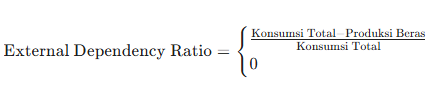

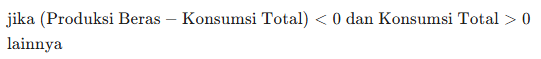

In [77]:
#Filter df_produksi
df_beras_produksi = df_produksi[df_produksi['Komoditas'] == 'Beras'].copy()

#ambil'Provinsi', 'Tahun', and 'Produksi_Ton' dari `df_beras_produksi, ganti nama Produksi_Ton menjadi Produksi_Beras_Ton
df_beras_produksi = df_beras_produksi[['Provinsi', 'Tahun', 'Produksi_Ton']].rename(columns={'Produksi_Ton': 'Produksi_Beras_Ton'})

#Agregasi df_demand untuk mendapatkan total konsumsi semua komoditas per provinsi/tahun
df_demand_Bpokok = df_demand.groupby(['Provinsi', 'Tahun'])['Konsumsi_Total_Ton'].sum().reset_index()

#gabung df_beras_produksi dan df_demand_Bpokok dengan 'Provinsi' and 'Tahun' (outer merge).
df_final = pd.merge(df_beras_produksi, df_demand_Bpokok, on=['Provinsi', 'Tahun'], how='outer')

#gabung `df_final` dengan `df_harga` melalui 'Provinsi' and 'Tahun' (left merge)
df_final = pd.merge(df_final, df_harga, on=['Provinsi', 'Tahun'], how='left')

#gabung the current `df_final` dengan `df_risk` melalui 'Provinsi' dan 'Tahun' (left merge)
df_final = pd.merge(df_final, df_risk, on=['Provinsi', 'Tahun'], how='left')

#isi nan dengan 0
df_final['Produksi_Beras_Ton'] = df_final['Produksi_Beras_Ton'].fillna(0)
df_final['Konsumsi_Total_Ton'] = df_final['Konsumsi_Total_Ton'].fillna(0)

#gunakan rumus surplu dan defisit
df_final['Surplus_Defisit_Ton'] = df_final['Produksi_Beras_Ton'] - df_final['Konsumsi_Total_Ton']

#rumus external dependency dengan lambda
df_final['edr_kberas'] = df_final.apply(
    lambda row: (row['Konsumsi_Total_Ton'] - row['Produksi_Beras_Ton']) / row['Konsumsi_Total_Ton']
    if row['Surplus_Defisit_Ton'] < 0 and row['Konsumsi_Total_Ton'] > 0 else 0, axis=1
)
df_prod_jagung_daging = df_produksi[df_produksi['Komoditas'].isin(['Jagung', 'Daging Sapi'])].copy()

df_prod_jagung_daging_pivot = df_prod_jagung_daging.pivot_table(
    index=['Provinsi', 'Tahun'],
    columns='Komoditas',
    values='Produksi_Ton',
    aggfunc='sum'
).reset_index()

df_prod_jagung_daging_pivot.rename(columns={
    'Jagung': 'Produksi_Jagung_Ton',
    'Daging Sapi': 'Produksi_DagingSapi_Ton'
}, inplace=True)

df_final = pd.merge(df_final, df_prod_jagung_daging_pivot, on=['Provinsi', 'Tahun'], how='left')

# AGregasi Nasional
nasional = df_final.groupby('Tahun').agg({
    'Produksi_Beras_Ton': 'sum',
    'Konsumsi_Total_Ton': 'sum',
    'harga_rata2beras_konsumen': 'mean'
}).reset_index()

# Merge dengan Data Ekspor dan Impor
nasional = pd.merge(nasional, df_EksporImpor_clean, on='Tahun', how='left')
nasional['Total_Ekspor_Nasional'] = nasional['Total_Ekspor_Nasional'].fillna(0)
nasional['Total_Impor_Nasional'] = nasional['Total_Impor_Nasional'].fillna(0)

# Hitung Neraca Akhir Nasional (Produksi - Konsumsi + Impor - Ekspor)
nasional['surplus/defisit_beras'] = (nasional['Produksi_Beras_Ton'] - nasional['Konsumsi_Total_Ton']) + nasional['Total_Impor_Nasional'] - nasional['Total_Ekspor_Nasional']

pd.set_option('display.float_format', '{:,.2f}'.format)
df_impor_bawang = df_impor_nasional[df_impor_nasional['Komoditas'].isin(['Bawang Putih', 'Bawang Merah'])].groupby('Tahun')['Volume_Impor_Ton'].sum().reset_index()
df_impor_bawang.rename(columns={'Volume_Impor_Ton': 'Impor_Bawang_Nasional'}, inplace=True)

df_impor_gula_kedelai = df_impor_nasional[df_impor_nasional['Komoditas'].isin(['Gula', 'Kedelai'])].pivot_table(
    index='Tahun',
    columns='Komoditas',
    values='Volume_Impor_Ton',
    aggfunc='sum'
).reset_index()
df_impor_gula_kedelai.rename(columns={
    'Gula': 'Impor_Gula_Nasional',
    'Kedelai': 'Impor_Kedelai_Nasional'
}, inplace=True)

df_nasional_sekunder = df_produksi[df_produksi['Komoditas'].isin(['Jagung', 'Daging Sapi'])].groupby(['Tahun', 'Komoditas'])['Produksi_Ton'].sum().unstack().reset_index()
df_nasional_sekunder.rename(columns={
    'Jagung': 'Produksi_Jagung_Nasional',
    'Daging Sapi': 'Produksi_DagingSapi_Nasional'
}, inplace=True)

nasional = pd.merge(nasional, df_impor_bawang, on='Tahun', how='left')
nasional = pd.merge(nasional, df_impor_gula_kedelai, on='Tahun', how='left')
nasional = pd.merge(nasional, df_nasional_sekunder, on='Tahun', how='left')

for col in ['Impor_Bawang_Nasional', 'Impor_Gula_Nasional', 'Impor_Kedelai_Nasional', 'Produksi_Jagung_Nasional', 'Produksi_DagingSapi_Nasional']:
    nasional[col] = nasional[col].fillna(0)

print("\nData Terintegrasi Level Provinsi:")
display(df_final.head())

print("\nData Terintegrasi Level Nasional")
display(nasional)


Data Terintegrasi Level Provinsi:


,Provinsi,Tahun,Produksi_Beras_Ton,Konsumsi_Total_Ton,harga_rata2beras_konsumen,Risk_Score_IKP,Kelompok_IKP,Kerentanan_Area,Surplus_Defisit_Ton,edr_kberas,Produksi_DagingSapi_Ton,Produksi_Jagung_Ton
0,Aceh,2021,"1,046,496.27","688,313.98","11,376.79",71.63,5,Tahan,"358,182.29",0.00,"11,674.10","57,835.80"
1,Aceh,2022,"966,353.73","697,889.49","11,465.12",70.16,5,Tahan,"268,464.24",0.00,"12,014.96","72,241.64"
2,Aceh,2023,"898,991.13","707,516.62","12,720.25",72.96,5,Tahan,"191,474.51",0.00,"15,644.50","66,363.62"
3,Aceh,2024,"1,062,710.41","716,846.94","13,726.97",73.94,5,Tahan,"345,863.47",0.00,"11,006.35","52,249.40"
4,Bali,2021,"396,226.70","908,781.57","11,107.33",83.82,6,Sangat Tahan,"-512,554.87",0.56,"4,650.67","50,117.54"



Data Terintegrasi Level Nasional


,Tahun,Produksi_Beras_Ton,Konsumsi_Total_Ton,harga_rata2beras_konsumen,Total_Ekspor_Nasional,Total_Impor_Nasional,Neraca_Ton,surplus/defisit_beras,Impor_Bawang_Nasional,Impor_Gula_Nasional,Impor_Kedelai_Nasional,Produksi_DagingSapi_Nasional,Produksi_Jagung_Nasional
0,2021,"34,836,671.36","51,950,069.83","11,796.44","3,411.00","407,741.40","-404,330.40","-16,709,068.07","602,744.60","15,729,709.00","7,945,078.40","487,802.20","13,414,921.72"
1,2022,"35,050,294.34","52,530,048.80","11,955.18","1,262.00","429,207.30","-427,945.30","-17,051,809.17","566,175.35","18,011,749.00","7,903,643.40","498,923.17","16,527,272.61"
2,2023,"34,558,631.84","53,121,802.11","13,375.60",914.00,"3,062,867.00","-3,061,953.00","-15,501,217.26","564,027.85","15,901,141.40","7,498,159.20","503,506.60","14,774,432.51"
3,2024,"34,021,973.60","53,830,260.10","14,712.55",630.00,"4,520,000.00","-4,519,370.00","-15,288,916.50","555,886.39","16,684,879.40","8,157,798.60","478,852.17","15,138,913.25"


# 4. Visualisasi Data


#PRODUKTIVITAS JAGUNG VS KEDELAI

In [78]:
try:
    df_prod = pd.read_csv(files['produktivitas_jagung_kedelai'])
    df_melt = df_prod.melt(id_vars=['Provinsi', 'Tahun'], value_vars=['Jagung', 'Kedelai'],
                           var_name='Komoditas', value_name='Produktivitas_KuHa')

    # Ambil rata-rata nasional per tahun
    df_trend_prod = df_melt.groupby(['Tahun', 'Komoditas'])['Produktivitas_KuHa'].mean().reset_index()

    fig_prod = px.bar(
        df_trend_prod,
        x='Tahun',
        y='Produktivitas_KuHa',
        color='Komoditas',
        barmode='group',
        title='Perbandingan Produktivitas Jagung vs Kedelai (Kw/Ha)',
        text_auto='.2f'
    )
    fig_prod.show()
except Exception as e:
    print(f"Gagal memuat data produktivitas: {e}")

# Tren Produksi Beras Nasional vs Harga Rata-rata Konsumen

In [79]:
fig_mixed = go.Figure()

#Bar trace
fig_mixed.add_trace(go.Bar(
    x=nasional['Tahun'],
    y=nasional['Produksi_Beras_Ton'],
    name='Produksi Beras (Ton)',
    yaxis='y1',
    marker_color='skyblue'
))

#Scatter trace
fig_mixed.add_trace(go.Scatter(
    x=nasional['Tahun'],
    y=nasional['harga_rata2beras_konsumen'],
    name='Harga Rata-rata Konsumen (Rp/Kg)',
    mode='lines+markers',
    yaxis='y2',
    line=dict(color='red', width=2)
))

#Update layout
fig_mixed.update_layout(
    title='Tren Produksi Beras Nasional vs Harga Rata-rata Konsumen',
    xaxis_title='Tahun',
    yaxis=dict(
        title='Produksi Beras (Ton)',
        titlefont=dict(color='skyblue'),
        tickfont=dict(color='skyblue'),
        side='left'
    ),
    yaxis2=dict(
        title='Harga Rata-rata Konsumen (Rp/Kg)',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    hovermode='x unified'
)

fig_mixed.show()

# Tren Volume Impor Bahan Pangan (2021-2024)

In [80]:
df_impor_nasional['Tahun'] = df_impor_nasional['Tahun'].astype(int)

# Urutkan DataFrame berdasarkan Komoditas dan Tahun
df_impor_nasional = df_impor_nasional.sort_values(by=['Komoditas', 'Tahun'])
def calculate_pct_change_from_2021(group):
    initial_year_value = group[group['Tahun'] == 2021]['Volume_Impor_Ton']
    if not initial_year_value.empty and initial_year_value.iloc[0] != 0:
        base_value = initial_year_value.iloc[0]
        group['Volume_Impor_Pct_Change'] = ((group['Volume_Impor_Ton'] - base_value) / base_value) * 100
    else:
        group['Volume_Impor_Pct_Change'] = np.nan
    return group

df_impor_nasional = df_impor_nasional.groupby('Komoditas').apply(calculate_pct_change_from_2021)

df_impor_nasional['Volume_Impor_Pct_Change'] = df_impor_nasional['Volume_Impor_Pct_Change'].fillna(0)

fig_impor = px.line(
    df_impor_nasional,
    x='Tahun',
    y='Volume_Impor_Pct_Change', # Menggunakan kolom persentase perubahan baru
    color='Komoditas',
    markers=True,
    title='Tren Persentase Perubahan Volume Impor Bahan Pangan (relatif terhadap 2021)',
    labels={'Volume_Impor_Pct_Change': 'Perubahan Volume (%)', 'Tahun': 'Tahun'}
)

min_val = df_impor_nasional['Volume_Impor_Pct_Change'].min()
max_val = df_impor_nasional['Volume_Impor_Pct_Change'].max()

buffer = (max_val - min_val) * 0.1
y_min = min_val - buffer
y_max = max_val + buffer

fig_impor.update_layout(height=800)
fig_impor.update_yaxes(tickformat=".2f", range=[y_min, y_max], dtick=50)
fig_impor.show()

# Chart Neraca (Surplus/Defisit)

In [81]:
colors = ['green' if x >= 0 else 'red' for x in df_EksporImpor_clean['Neraca_Ton']]

fig_bal = go.Figure()
fig_bal.add_trace(go.Bar(
x=df_EksporImpor_clean['Tahun'],
y=df_EksporImpor_clean['Neraca_Ton'],
marker_color=colors,
text=df_EksporImpor_clean['Neraca_Ton'].apply(lambda x: f'{x:,.0f}'), # Label angka
textposition='auto',
name='Neraca'
))
fig_bal.update_layout(title='Neraca Perdagangan Beras (Surplus vs Defisit)',
  yaxis_title='Net Volume (Ton)', xaxis_title='Tahun')
fig_bal.show()

#Tren Ekspor vs Impor Beras

# Persentase Kenaikan atau Penurunan berdasarkan tahun awal yakni tahun 2021

In [82]:
#Tren Ekspor vs Impor
# Filter data dari 2021 ke atas
df_EksporImpor_filtered_for_pct = df_EksporImpor_clean[df_EksporImpor_clean['Tahun'] >= 2021].copy()

initial_impor_2021 = df_EksporImpor_filtered_for_pct[df_EksporImpor_filtered_for_pct['Tahun'] == 2021]['Total_Impor_Nasional'].iloc[0]
initial_ekspor_2021 = df_EksporImpor_filtered_for_pct[df_EksporImpor_filtered_for_pct['Tahun'] == 2021]['Total_Ekspor_Nasional'].iloc[0]

# Hitung persentase perubahan berdasarkan tahun 2021
df_EksporImpor_filtered_for_pct['Vol_Impor_Pct'] = ((df_EksporImpor_filtered_for_pct['Total_Impor_Nasional'] - initial_impor_2021) / initial_impor_2021) * 100
df_EksporImpor_filtered_for_pct['Vol_Ekspor_Pct'] = ((df_EksporImpor_filtered_for_pct['Total_Ekspor_Nasional'] - initial_ekspor_2021) / initial_ekspor_2021) * 100

print("Perubahan persentase tahun-ke-tahun untuk impor dan ekspor nasional berhasil dihitung berdasarkan tahun 2021.")

fig_trend = go.Figure()

fig_trend.add_trace(go.Scatter(x=df_EksporImpor_filtered_for_pct['Tahun'], y=df_EksporImpor_filtered_for_pct['Vol_Impor_Pct'],
    name='Tren Impor(%)', mode='lines+markers', line=dict(color='red'), yaxis='y2'))
fig_trend.add_trace(go.Scatter(x=df_EksporImpor_filtered_for_pct['Tahun'], y=df_EksporImpor_filtered_for_pct['Vol_Ekspor_Pct'],
    name='Tren Ekspor(%)', mode='lines+markers', line=dict(color='green'), yaxis='y2'))

# Impor tertinggi (persentase)
max_impor_pct_idx = df_EksporImpor_filtered_for_pct['Vol_Impor_Pct'].idxmax()
max_impor_pct_year = df_EksporImpor_filtered_for_pct.loc[max_impor_pct_idx, 'Tahun']
max_impor_pct_value = df_EksporImpor_filtered_for_pct.loc[max_impor_pct_idx, 'Vol_Impor_Pct']

# Impor tertinggi (volume)
max_impor_vol_idx = df_EksporImpor_clean['Total_Impor_Nasional'].idxmax()
max_impor_vol_year = df_EksporImpor_clean.loc[max_impor_vol_idx, 'Tahun']
max_impor_vol_value = df_EksporImpor_clean.loc[max_impor_vol_idx, 'Total_Impor_Nasional']

# Ekspor terendah (persentase)
min_ekspor_pct_idx = df_EksporImpor_filtered_for_pct['Vol_Ekspor_Pct'].idxmin()
min_ekspor_pct_year = df_EksporImpor_filtered_for_pct.loc[min_ekspor_pct_idx, 'Tahun']
min_ekspor_pct_value = df_EksporImpor_filtered_for_pct.loc[min_ekspor_pct_idx, 'Vol_Ekspor_Pct']


fig_trend.add_trace(go.Scatter(
    x=[max_impor_pct_year], y=[max_impor_pct_value],
    mode='markers',
    marker=dict(size=10, color='red', symbol='star'),
    name='Impor (%) Tertinggi',
    hoverinfo='text',
    text=f'Tahun: {max_impor_pct_year}<br>Impor (%): {max_impor_pct_value:.2f}%',
    yaxis='y2'
))
fig_trend.add_annotation(
    x=max_impor_pct_year, y=max_impor_pct_value, text=f'{max_impor_pct_value:.0f}%',
    showarrow=True, arrowhead=1, yshift=10, font=dict(color="red"), xref='x', yref='y2'
)

fig_trend.add_trace(go.Scatter(
    x=[min_ekspor_pct_year], y=[min_ekspor_pct_value],
    mode='markers',
    marker=dict(size=10, color='blue', symbol='x'),
    name='Ekspor (%) Terendah',
    hoverinfo='text',
    text=f'Tahun: {min_ekspor_pct_year}<br>Ekspor (%): {min_ekspor_pct_value:.2f}%',
    yaxis='y2'
))
fig_trend.add_annotation(
    x=min_ekspor_pct_year, y=min_ekspor_pct_value, text=f'{min_ekspor_pct_value:.0f}%',
    showarrow=True, arrowhead=1, yshift=-10, font=dict(color="blue"), xref='x', yref='y2'
)


fig_trend.update_layout(title='Tren Ekspor vs Impor Beras (Persentase Perubahan dari 2021)',
yaxis=dict(
    title='Volume (Ton)',
    side='left',
    showgrid=False
),
yaxis2=dict(
    title='Perubahan Relatif (%) terhadap 2021',
    overlaying='y',
    side='right',
    dtick=50,
    showgrid=False

),
xaxis_title='Tahun',
legend=dict(x=0.1, y=1.1, orientation='h'),
hovermode='x unified')
fig_trend.show()

#Tren Ekspor Beras
df_ekspor_filtered = df_EksporImpor_clean[df_EksporImpor_clean['Tahun'].between(2021, 2024)].copy()

min_ekspor_vol_idx_filtered = df_ekspor_filtered['Total_Ekspor_Nasional'].idxmin()
min_ekspor_vol_year_filtered = df_ekspor_filtered.loc[min_ekspor_vol_idx_filtered, 'Tahun']
min_ekspor_vol_value_filtered = df_ekspor_filtered.loc[min_ekspor_vol_idx_filtered, 'Total_Ekspor_Nasional']

fig_trend1 = go.Figure()
fig_trend1.add_trace(go.Scatter(x=df_ekspor_filtered['Tahun'], y=df_ekspor_filtered['Total_Ekspor_Nasional'],
   name='Ekspor (Keluar)', mode='lines+markers', line=dict(color='green', width=3)))

fig_trend1.add_trace(go.Scatter(
    x=[min_ekspor_vol_year_filtered], y=[min_ekspor_vol_value_filtered],
    mode='markers',
    marker=dict(size=10, color='blue', symbol='diamond'),
    name='Ekspor (Ton) Terendah',
    hoverinfo='text',
    text=f'Tahun: {min_ekspor_vol_year_filtered}<br>Ekspor (Ton): {min_ekspor_vol_value_filtered:,.0f}'
))
fig_trend1.add_annotation(
    x=min_ekspor_vol_year_filtered, y=min_ekspor_vol_value_filtered, text=f'{min_ekspor_vol_value_filtered:,.0f}',
    showarrow=True, arrowhead=1, yshift=-10, font=dict(color="blue"), xref='x', yref='y'
)

fig_trend1.update_layout(title='Tren Ekspor Beras (2021-2024)',
yaxis_title='Volume (Ton)', xaxis_title='Tahun')
fig_trend1.show()

#Tren Impor Beras
fig_trend2 = go.Figure()
fig_trend2.add_trace(go.Scatter(x=df_EksporImpor_clean['Tahun'], y=df_EksporImpor_clean['Total_Impor_Nasional'],
   name='Impor (Masuk)', mode='lines+markers', line=dict(color='red', width=3)))
fig_trend2.update_layout(title='Tren Impor Beras (2020-2024)',
yaxis_title='Volume (Ton)', xaxis_title='Tahun')


fig_trend2.add_trace(go.Scatter(
    x=[max_impor_vol_year], y=[max_impor_vol_value],
    mode='markers',
    marker=dict(size=10, color='red', symbol='circle'),
    name='Impor (Ton) Tertinggi',
    hoverinfo='text',
    text=f'Tahun: {max_impor_vol_year}<br>Impor (Ton): {max_impor_vol_value:,.0f}',
    yaxis='y1'
))
fig_trend2.add_annotation(
    x=max_impor_vol_year, y=max_impor_vol_value, text=f'{max_impor_vol_value:,.0f}',
    showarrow=True, arrowhead=1, yshift=10, font=dict(color="red"), xref='x', yref='y'
)

fig_trend2.show()

Perubahan persentase tahun-ke-tahun untuk impor dan ekspor nasional berhasil dihitung berdasarkan tahun 2021.


# Persentase Kenaikan atau Penurunan berdasarkan tahun sebelumnya

In [83]:
# Pastikan kolom 'Tahun' bertipe integer untuk pengurutan yang benar
df_impor_nasional['Tahun'] = df_impor_nasional['Tahun'].astype(int)
df_impor_nasional = df_impor_nasional.reset_index(drop=True)

# Urutkan DataFrame berdasarkan Komoditas dan Tahun
df_impor_nasional = df_impor_nasional.sort_values(by=['Komoditas', 'Tahun'])

# Hitung persentase perubahan volume impor dari tahun ke tahun per komoditas
df_impor_nasional['Volume_Impor_Pct_Change'] = df_impor_nasional.groupby('Komoditas')['Volume_Impor_Ton'].pct_change() * 100

# Ganti nilai Inf atau -Inf (yang muncul jika ada perubahan dari/ke 0) dengan NaN
df_impor_nasional['Volume_Impor_Pct_Change'] = df_impor_nasional['Volume_Impor_Pct_Change'].replace([np.inf, -np.inf], np.nan)

# Isi NaN (termasuk untuk tahun pertama setiap komoditas atau hasil dari Inf) dengan 0 agar tetap ditampilkan
df_impor_nasional['Volume_Impor_Pct_Change'] = df_impor_nasional['Volume_Impor_Pct_Change'].fillna(0)

fig_impor = px.line(
    df_impor_nasional,
    x='Tahun',
    y='Volume_Impor_Pct_Change',
    color='Komoditas',
    markers=True,
    title='Tren Persentase Perubahan Volume Impor Bahan Pangan (2021-2024)',
    labels={'Volume_Impor_Pct_Change': 'Perubahan Volume (%)', 'Tahun': 'Tahun'}
)


min_val = df_impor_nasional['Volume_Impor_Pct_Change'].min()
max_val = df_impor_nasional['Volume_Impor_Pct_Change'].max()

buffer = (max_val - min_val) * 0.1
y_min = min_val - buffer
y_max = max_val + buffer

fig_impor.update_layout(height=800)
fig_impor.update_yaxes(tickformat=".2f", range=[y_min, y_max], dtick=50)
fig_impor.show()

#Tren Ekspor vs Impor
df_EksporImpor_clean['Vol_Impor_Pct'] = df_EksporImpor_clean['Total_Impor_Nasional'].pct_change() * 100
df_EksporImpor_clean['Vol_Ekspor_Pct'] = df_EksporImpor_clean['Total_Ekspor_Nasional'].pct_change() * 100

print("Perubahan persentase tahun-ke-tahun untuk impor dan ekspor nasional berhasil dihitung.")
fig_trend = go.Figure()

fig_trend.add_trace(go.Scatter(x=df_EksporImpor_clean['Tahun'], y=df_EksporImpor_clean['Vol_Impor_Pct'],
    name='Tren Impor(%)', mode='lines+markers', line=dict(color='red'), yaxis='y2'))
fig_trend.add_trace(go.Scatter(x=df_EksporImpor_clean['Tahun'], y=df_EksporImpor_clean['Vol_Ekspor_Pct'],
    name='Tren Ekspor(%)', mode='lines+markers', line=dict(color='green'), yaxis='y2'))

# Temukan titik tertinggi/terendah
# Impor tertinggi (persentase)
max_impor_pct_idx = df_EksporImpor_clean['Vol_Impor_Pct'].idxmax()
max_impor_pct_year = df_EksporImpor_clean.loc[max_impor_pct_idx, 'Tahun']
max_impor_pct_value = df_EksporImpor_clean.loc[max_impor_pct_idx, 'Vol_Impor_Pct']

# Impor tertinggi (volume)
max_impor_vol_idx = df_EksporImpor_clean['Total_Impor_Nasional'].idxmax()
max_impor_vol_year = df_EksporImpor_clean.loc[max_impor_vol_idx, 'Tahun']
max_impor_vol_value = df_EksporImpor_clean.loc[max_impor_vol_idx, 'Total_Impor_Nasional']

# Ekspor terendah (persentase)
min_ekspor_pct_idx = df_EksporImpor_clean['Vol_Ekspor_Pct'].idxmin()
min_ekspor_pct_year = df_EksporImpor_clean.loc[min_ekspor_pct_idx, 'Tahun']
min_ekspor_pct_value = df_EksporImpor_clean.loc[min_ekspor_pct_idx, 'Vol_Ekspor_Pct']


# Tambahkan penanda untuk Impor tertinggi (persentase)
fig_trend.add_trace(go.Scatter(
    x=[max_impor_pct_year], y=[max_impor_pct_value],
    mode='markers',
    marker=dict(size=10, color='red', symbol='star'),
    name='Impor (%) Tertinggi',
    hoverinfo='text',
    text=f'Tahun: {max_impor_pct_year}<br>Impor (%): {max_impor_pct_value:.2f}',
    yaxis='y2'
))
fig_trend.add_annotation(
    x=max_impor_pct_year, y=max_impor_pct_value, text=f'{max_impor_pct_value:.0f}%',
    showarrow=True, arrowhead=1, yshift=10, font=dict(color="red"), xref='x', yref='y2'
)


# Tambahkan penanda untuk Ekspor terendah (persentase)
fig_trend.add_trace(go.Scatter(
    x=[min_ekspor_pct_year], y=[min_ekspor_pct_value],
    mode='markers',
    marker=dict(size=10, color='blue', symbol='x'),
    name='Ekspor (%) Terendah',
    hoverinfo='text',
    text=f'Tahun: {min_ekspor_pct_year}<br>Ekspor (%): {min_ekspor_pct_value:.2f}',
    yaxis='y2'
))
fig_trend.add_annotation(
    x=min_ekspor_pct_year, y=min_ekspor_pct_value, text=f'{min_ekspor_pct_value:.0f}%',
    showarrow=True, arrowhead=1, yshift=-10, font=dict(color="blue"), xref='x', yref='y2'
)


fig_trend.update_layout(title='Tren Ekspor vs Impor Beras (2020-2024)',
yaxis=dict(
    title='Volume (Ton)',
    side='left',
    showgrid=False
),
yaxis2=dict(
    title='Perubahan (%)',
    overlaying='y',
    side='right',
    dtick=50,
    showgrid=False

),
xaxis_title='Tahun',
legend=dict(x=0.1, y=1.1, orientation='h'),
hovermode='x unified')
fig_trend.show()

#Tren Ekspor Beras
df_ekspor_filtered = df_EksporImpor_clean[df_EksporImpor_clean['Tahun'].between(2021, 2024)].copy()

min_ekspor_vol_idx_filtered = df_ekspor_filtered['Total_Ekspor_Nasional'].idxmin()
min_ekspor_vol_year_filtered = df_ekspor_filtered.loc[min_ekspor_vol_idx_filtered, 'Tahun']
min_ekspor_vol_value_filtered = df_ekspor_filtered.loc[min_ekspor_vol_idx_filtered, 'Total_Ekspor_Nasional']

fig_trend1 = go.Figure()
fig_trend1.add_trace(go.Scatter(x=df_ekspor_filtered['Tahun'], y=df_ekspor_filtered['Total_Ekspor_Nasional'],
   name='Ekspor (Keluar)', mode='lines+markers', line=dict(color='green', width=3)))

fig_trend1.add_trace(go.Scatter(
    x=[min_ekspor_vol_year_filtered], y=[min_ekspor_vol_value_filtered],
    mode='markers',
    marker=dict(size=10, color='blue', symbol='diamond'),
    name='Ekspor (Ton) Terendah',
    hoverinfo='text',
    text=f'Tahun: {min_ekspor_vol_year_filtered}<br>Ekspor (Ton): {min_ekspor_vol_value_filtered:,.0f}'
))
fig_trend1.add_annotation(
    x=min_ekspor_vol_year_filtered, y=min_ekspor_vol_value_filtered, text=f'{min_ekspor_vol_value_filtered:,.0f}',
    showarrow=True, arrowhead=1, yshift=-10, font=dict(color="blue"), xref='x', yref='y'
)

fig_trend1.update_layout(title='Tren Ekspor Beras (2021-2024)',
yaxis_title='Volume (Ton)', xaxis_title='Tahun')
fig_trend1.show()

#Tren Impor Beras
fig_trend2 = go.Figure()
fig_trend2.add_trace(go.Scatter(x=df_EksporImpor_clean['Tahun'], y=df_EksporImpor_clean['Total_Impor_Nasional'],
   name='Impor (Masuk)', mode='lines+markers', line=dict(color='red', width=3)))
fig_trend2.update_layout(title='Tren Impor Beras (2020-2024)',
yaxis_title='Volume (Ton)', xaxis_title='Tahun')

# Tambahkan penanda untuk Impor tertinggi (volume)
fig_trend2.add_trace(go.Scatter(
    x=[max_impor_vol_year], y=[max_impor_vol_value],
    mode='markers',
    marker=dict(size=10, color='red', symbol='circle'),
    name='Impor (Ton) Tertinggi',
    hoverinfo='text',
    text=f'Tahun: {max_impor_vol_year}<br>Impor (Ton): {max_impor_vol_value:,.0f}',
    yaxis='y1'
))
fig_trend2.add_annotation(
    x=max_impor_vol_year, y=max_impor_vol_value, text=f'{max_impor_vol_value:,.0f}',
    showarrow=True, arrowhead=1, yshift=10, font=dict(color="red"), xref='x', yref='y'
)

fig_trend2.show()

Perubahan persentase tahun-ke-tahun untuk impor dan ekspor nasional berhasil dihitung.


#Volatilitas Harga vs Produksi

In [84]:
nasional['Vol_Prod_Pct'] = nasional['Produksi_Beras_Ton'].pct_change() * 100
nasional['Vol_Harga_Pct'] = nasional['harga_rata2beras_konsumen'].pct_change() * 100

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=nasional['Tahun'], y=nasional['Vol_Prod_Pct'], name='Volatilitas Produksi (%)', line=dict(dash='dot')))
fig2.add_trace(go.Scatter(x=nasional['Tahun'], y=nasional['Vol_Harga_Pct'], name='Volatilitas Harga (%)', line=dict(color='orange')))
fig2.update_layout(title='Analisis Volatilitas: Sensitivitas Harga terhadap Guncangan Produksi', yaxis_title='Perubahan Tahunan (%)')
fig2.show()

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=nasional['Tahun'], y=nasional['Vol_Prod_Pct'], name='Volatilitas Produksi (%)', line=dict(dash='dot')))
fig3.update_layout(title='Volatilitas Produksi', yaxis_title='Perubahan Tahunan (%)')
fig3.show()

fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=nasional['Tahun'], y=nasional['Vol_Harga_Pct'], name='Volatilitas Harga (%)', line=dict(color='orange')))
fig4.update_layout(title='Volatilitas Harga', yaxis_title='Perubahan Tahunan (%)')
fig4.show()


#Heatmap Korelasi Antar Variabel

In [85]:
cols_allkore = [
    'Produksi_Beras_Ton', 'Konsumsi_Total_Ton', 'harga_rata2beras_konsumen',
    'Total_Impor_Nasional', 'Total_Ekspor_Nasional', 'surplus/defisit_beras',
    'Produksi_Jagung_Nasional', 'Produksi_DagingSapi_Nasional',
    'Impor_Gula_Nasional', 'Impor_Kedelai_Nasional', 'Impor_Bawang_Nasional'
]
df_allkore = nasional[cols_allkore].corr()

fig_allkore = px.imshow(
    df_allkore,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdBu',
    color_continuous_midpoint=0,
    title='Heatmap Korelasi: Produksi, Harga, dan Perdagangan Komoditas'
)
fig_allkore.update_layout(width=1000, height=800)
fig_allkore.show()

# Peta Kerentanan dan Ketahanan Pangan

In [86]:
try:
    with open('38 Provinsi Indonesia.json') as f:
        geojson = json.load(f)
        tahun_mapping = {
    1: 2021,
    2: 2022,
    3: 2023,
    4: 2024
}

    while True:
        try:
            pilihan = int(4)
            if pilihan in tahun_mapping:
                tahun_dipilih = tahun_mapping[pilihan]
                print(f"Tahun yang dipilih: {tahun_dipilih}")
                break
            else:
                print("Input tidak valid. Harap masukkan angka antara 1 dan 4.")
        except ValueError:
            print("Input tidak valid. Harap masukkan angka.")

    # df_map sekarang akan unik berdasarkan Provinsi dan Tahun karena perubahan di df_final
    df_map = df_final[df_final['Tahun'] == tahun_dipilih].copy()

    # isi nan
    if df_map['Risk_Score_IKP'].isnull().any():
        mean_ikp = df_map['Risk_Score_IKP'].mean()
        df_map['Risk_Score_IKP'].fillna(mean_ikp, inplace=True)

    print("\ncek peta")
    print("Head of df_map:\n", df_map.head())
    print("Ada kosong di 'Surplus_Defisit_Ton'? :", df_map['Surplus_Defisit_Ton'].isnull().sum())
    print("Ada kosong di 'Risk_Score_IKP'? (df_map, after fillna):", df_map['Risk_Score_IKP'].isnull().sum())

    # provinsi di df_map
    df_map_provinces = sorted(list(df_map['Provinsi'].unique()))
    print("\nProvinsi di df_map:", df_map_provinces)

    # cek provinsi di geojson
    prov_geojson = [feature['properties']['PROVINSI'] for feature in geojson['features'] if 'PROVINSI' in feature['properties']]
    prov_geojson = sorted(list(set(prov_geojson)))
    print("\nSemua Provinsi di GeoJSON:", prov_geojson)

    # cek hilang tidak datanya
    tidakcocok_di_df_map = [p for p in df_map_provinces if p not in prov_geojson]
    tidakcocok_di_geojson = [p for p in prov_geojson if p not in df_map_provinces]
    print("\nProvinsi di df_map tidak ada GeoJSON:", tidakcocok_di_df_map)
    print("Provinsi di GeoJSON tidak ada di df_map:", tidakcocok_di_geojson)

    # Cek IKP
    print("\nCek IKP per provinsi, karena ada pemekaran wilayah tahun 2022")
    cek_provinsi = ['Jawa Barat', 'Sumatera Utara', 'Kalimantan Barat', 'Papua', 'Papua Tengah', 'Papua Pegunungan', 'Papua Selatan', 'Papua Barat Daya']
    for region in cek_provinsi:
        if region in df_map['Provinsi'].values:
            score = df_map[df_map['Provinsi'] == region]['Risk_Score_IKP'].iloc[0]
            print(f"  {region}: {score:.2f}")
        else:
            print(f"  {region}: Not found in df_map")

    #gabung data mapya
    df_map_data_dict = df_map.set_index('Provinsi')[[
        'Surplus_Defisit_Ton', 'Produksi_Beras_Ton', 'Konsumsi_Total_Ton',
        'harga_rata2beras_konsumen', 'Risk_Score_IKP', 'edr_kberas',
        'Kelompok_IKP', 'Kerentanan_Area', 'Produksi_Jagung_Ton', 'Produksi_DagingSapi_Ton'
    ]].to_dict('index')

    for feature in geojson['features']:
        prov_geojson = feature['properties']['PROVINSI']
        if prov_geojson in df_map_data_dict:
            data_for_province = df_map_data_dict[prov_geojson]
            feature['properties']['Surplus_Defisit_Ton'] = data_for_province['Surplus_Defisit_Ton']
            feature['properties']['Produksi_Beras_Ton'] = data_for_province['Produksi_Beras_Ton']
            feature['properties']['Konsumsi_Total_Ton'] = data_for_province['Konsumsi_Total_Ton']
            feature['properties']['harga_rata2beras_konsumen'] = data_for_province['harga_rata2beras_konsumen']
            feature['properties']['Risk_Score_IKP'] = data_for_province['Risk_Score_IKP']
            feature['properties']['Kelompok_IKP'] = data_for_province['Kelompok_IKP']
            feature['properties']['Kerentanan_Area'] = data_for_province['Kerentanan_Area']
            feature['properties']['edr_kberas'] = data_for_province['edr_kberas']
            feature['properties']['Produksi_Jagung_Ton'] = data_for_province['Produksi_Jagung_Ton']
            feature['properties']['Produksi_DagingSapi_Ton'] = data_for_province['Produksi_DagingSapi_Ton']
        else:
            feature['properties']['Surplus_Defisit_Ton'] = np.nan
            feature['properties']['Produksi_Beras_Ton'] = np.nan
            feature['properties']['Konsumsi_Total_Ton'] = np.nan
            feature['properties']['harga_rata2beras_konsumen'] = np.nan
            feature['properties']['Risk_Score_IKP'] = np.nan
            feature['properties']['edr_kberas'] = np.nan
            feature['properties']['Kelompok_IKP'] = np.nan
            feature['properties']['Kerentanan_Area'] = 'Data Tidak Tersedia'
            feature['properties']['Produksi_Jagung_Ton'] = np.nan # Tambah Jagung
            feature['properties']['Produksi_DagingSapi_Ton'] = np.nan # Tambah Daging Sapi

    # rentang
    bins_ikp = [37, 50, 59, 67, 75, df_map['Risk_Score_IKP'].max()]
    bins_ikp = sorted(list(np.unique(bins_ikp)))
    print("\nrentang berdasarkan kategori kerentanan", bins_ikp)

    #supaya tidak duplikat layernya
    m = folium.Map(location=[-2.5, 118.0], zoom_start=5, control_scale=True)
    folium.Choropleth(
        geo_data=geojson,
        data=df_map,
        columns=['Provinsi', 'Risk_Score_IKP'], # Primary key buat cocokin dengan geojson
        key_on='feature.properties.PROVINSI',
        fill_color='RdYlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        bins=bins_ikp,#custom rentang datanya
        legend_name='Risk Score IKP (2024)',#data yang dipake
        highlight=True
    ).add_to(m)
  #Tooltip
    style_function = lambda x: {'fillColor': 'transparent', 'color':'transparent', 'fillOpacity': 0.1, 'weight': 0.1}
    highlight_function = lambda x: {'fillColor': '#000000', 'color':'#000000', 'fillOpacity': 0.50, 'weight': 0.1}

    folium.features.GeoJson(
        geojson,
        style_function=style_function,
        control=False,
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=[
                'PROVINSI',
                'Surplus_Defisit_Ton',
                'Produksi_Beras_Ton',
                'Produksi_Jagung_Ton',
                'Produksi_DagingSapi_Ton',
                'Konsumsi_Total_Ton',
                'harga_rata2beras_konsumen',
                'Risk_Score_IKP',
                'Kelompok_IKP',
                'Kerentanan_Area',
                'edr_kberas'
            ],
            aliases=[
                'Provinsi:',
                'Surplus/Defisit (Ton):',
                'Produksi Beras (Ton):',
                'Produksi Jagung (Ton):',
                'Produksi Daging Sapi (Ton):',
                'Konsumsi (Ton):',
                'Harga Rata-rata Konsumen:',
                'Skor IKP:',
                'Kelompok IKP:',
                'Kerentanan Area:',
                'Rasio Ketergantungan Eksternal (komoditas beras):'
            ],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
            localize=True
        )
    ).add_to(m)
    display(m)

except Exception as e:
    print(f"File GeoJSON tidak ditemukan di folder atau ada error lain: {e}")



Tahun yang dipilih: 2024

cek peta
Head of df_map:
        Provinsi  Tahun  Produksi_Beras_Ton  Konsumsi_Total_Ton  \
3          Aceh   2024        1,062,710.41          716,846.94   
7          Bali   2024          406,830.04          923,488.06   
11       Banten   2024          992,709.14        1,715,089.22   
15     Bengkulu   2024          174,677.64          323,166.60   
19  DKI Jakarta   2024            1,476.65        1,555,034.55   

    harga_rata2beras_konsumen  Risk_Score_IKP  Kelompok_IKP Kerentanan_Area  \
3                   13,726.97           73.94             5           Tahan   
7                   14,201.26           88.23             6    Sangat Tahan   
11                  13,693.29           79.25             6    Sangat Tahan   
15                  14,176.74           73.39             5           Tahan   
19                  14,650.81           85.13             6    Sangat Tahan   

    Surplus_Defisit_Ton  edr_kberas  Produksi_DagingSapi_Ton  \
3           

# *Cek Skewness untuk data pemekaran wilayah*

Cek nnull
Jumlah nilai yang kosong pada 'Risk_Score_IKP': 0
Tidak ditemukan nilai kosong pada 'Risk_Score_IKP'. Ini baik, karena nilai IKP telah diimputasi pada langkah sebelumnya.

Identifikasi Outlier (Boxplot dan IQR)


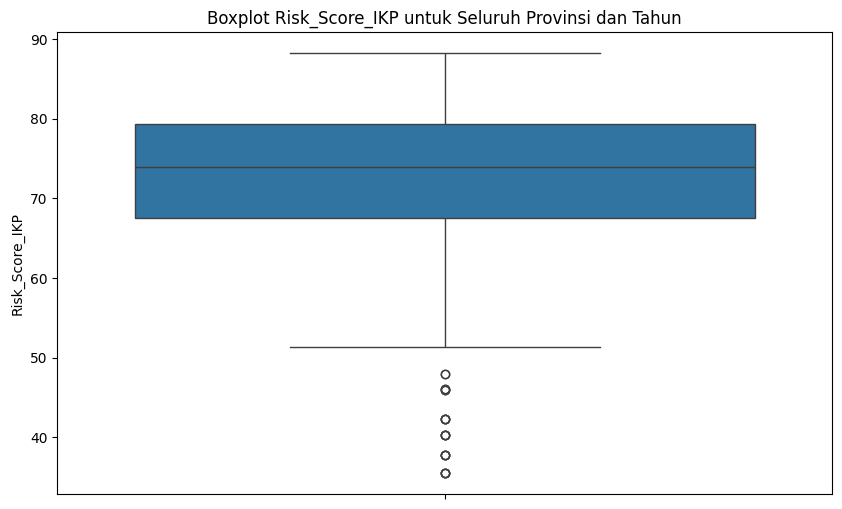

Q1 (persentil 25): 67.53
Q3 (persentil 75): 79.30
IQR: 11.77
Batas bawah outlier: 49.88
Batas atas outlier: 96.95

Jumlah outlier yang teridentifikasi: 22
Outlier (provinsi dan tahun dengan nilai IKP di luar batas IQR):


,Provinsi,Tahun,Risk_Score_IKP
92,Papua,2021,35.48
104,Papua Pegunungan,2021,35.48
108,Papua Selatan,2021,35.48
112,Papua Tengah,2021,35.48
105,Papua Pegunungan,2022,37.80
109,Papua Selatan,2022,37.80
113,Papua Tengah,2022,37.80
93,Papua,2022,37.80
115,Papua Tengah,2024,40.21
111,Papua Selatan,2024,40.21



Perhitungan Skewness Keseluruhan
Skewness keseluruhan untuk 'Risk_Score_IKP': -1.27
Interpretasi: Distribusi IKP cenderung condong ke kiri (left-skewed), ekor distribusi lebih panjang di kiri. Hal ini menunjukkan lebih banyak provinsi memiliki nilai IKP lebih tinggi dan sedikit provinsi dengan nilai IKP rendah.

Histogram IKP per Tahun (seluruh provinsi)


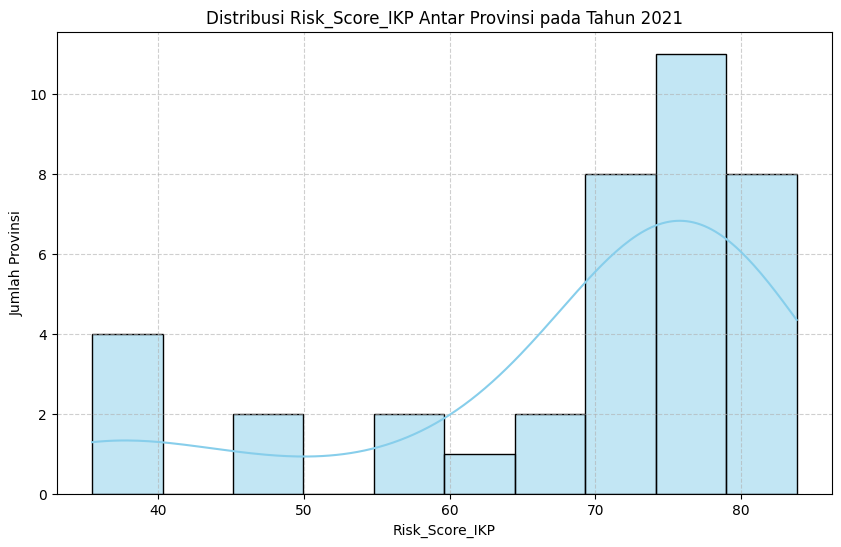

Skewness tahun 2021: -1.45


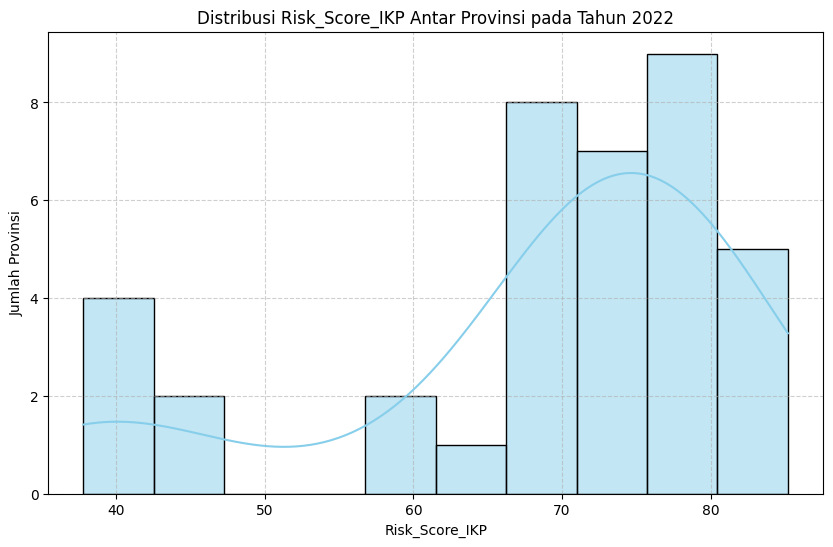

Skewness tahun 2022: -1.31


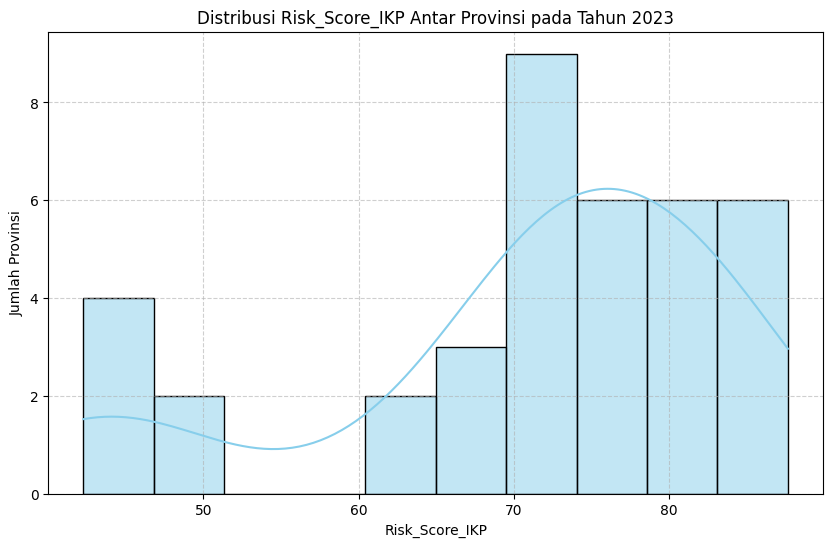

Skewness tahun 2023: -1.20


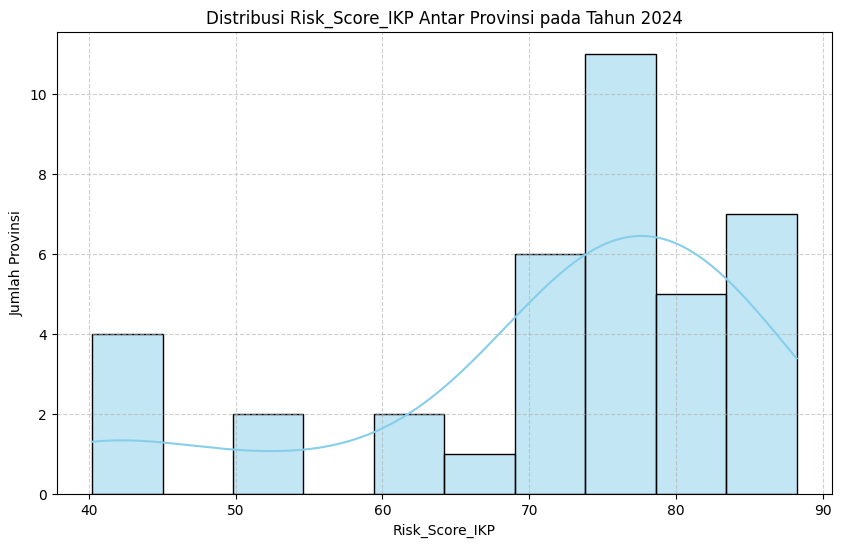

Skewness tahun 2024: -1.29

Perbandingan IKP Provinsi Pemekaran Papua dengan Provinsi Induk
Nilai IKP untuk provinsi terkait Papua:


,Provinsi,Tahun,Risk_Score_IKP,Kelompok_IKP,Kerentanan_Area
92,Papua,2021,35.48,1,Sangat Rentan
96,Papua Barat,2021,46.05,2,Rentan
100,Papua Barat Daya,2021,46.05,2,Rentan
104,Papua Pegunungan,2021,35.48,1,Sangat Rentan
108,Papua Selatan,2021,35.48,1,Sangat Rentan
112,Papua Tengah,2021,35.48,1,Sangat Rentan
93,Papua,2022,37.80,2,Rentan
97,Papua Barat,2022,45.92,2,Rentan
101,Papua Barat Daya,2022,45.92,2,Rentan
105,Papua Pegunungan,2022,37.80,2,Rentan


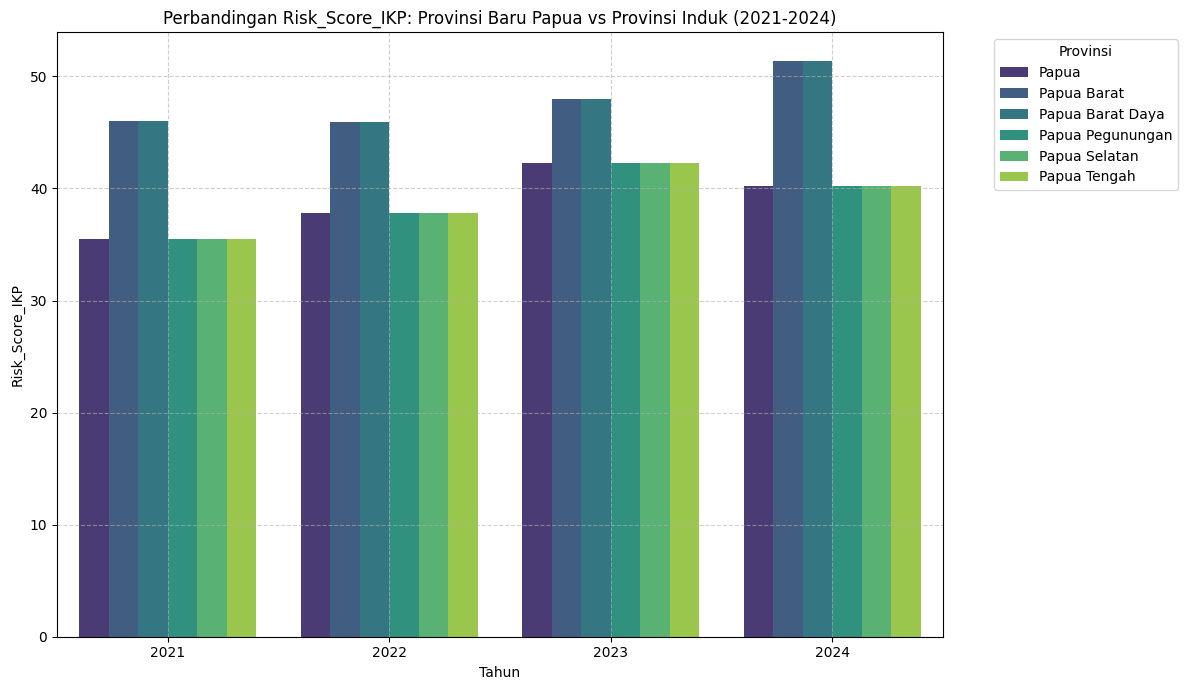


Skewness IKP untuk Provinsi Terkait Papua per Tahun
Skewness IKP provinsi terkait Papua tahun 2021: 0.97
  Interpretasi: Distribusi condong ke kanan.
Skewness IKP provinsi terkait Papua tahun 2022: 0.97
  Interpretasi: Distribusi condong ke kanan.
Skewness IKP provinsi terkait Papua tahun 2023: 0.97
  Interpretasi: Distribusi condong ke kanan.
Skewness IKP provinsi terkait Papua tahun 2024: 0.97
  Interpretasi: Distribusi condong ke kanan.

Interpretasi IKP Provinsi Papua:

Analisis Papua Selatan dan induknya Papua (tahun 2021-2024):
  - Tahun 2021: Papua Selatan IKP = 35.48, Papua IKP = 35.48. Selisih = 0.00
    Catatan: IKP Papua Selatan hampir identik dengan induknya. Ini sesuai dengan proses imputasi.
  - Tahun 2022: Papua Selatan IKP = 37.80, Papua IKP = 37.80. Selisih = 0.00
    Catatan: IKP Papua Selatan hampir identik dengan induknya. Ini sesuai dengan proses imputasi.
  - Tahun 2023: Papua Selatan IKP = 42.27, Papua IKP = 42.27. Selisih = 0.00
    Catatan: IKP Papua Selatan h

In [97]:
from scipy.stats import skew
# 1. Mengecek nilai kosong pada kolom 'Risk_Score_IKP'
print("Cek nnull")
missing_values_count = df_final['Risk_Score_IKP'].isnull().sum()
print(f"Jumlah nilai yang kosong pada 'Risk_Score_IKP': {missing_values_count}")
if missing_values_count > 0:
    print("Pertimbangkan untuk menangani nilai kosong ini apabila belum dilakukan.")
else:
    print("Tidak ditemukan nilai kosong pada 'Risk_Score_IKP'. Ini baik, karena nilai IKP telah diimputasi pada langkah sebelumnya.")

# 2. Identifikasi outlier menggunakan boxplot dan metode IQR
print("\nIdentifikasi Outlier (Boxplot dan IQR)")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_final['Risk_Score_IKP'])
plt.title('Boxplot Risk_Score_IKP untuk Seluruh Provinsi dan Tahun')
plt.ylabel('Risk_Score_IKP')
plt.show()

# Menghitung IQR
Q1 = df_final['Risk_Score_IKP'].quantile(0.25)
Q3 = df_final['Risk_Score_IKP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (persentil 25): {Q1:.2f}")
print(f"Q3 (persentil 75): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Batas bawah outlier: {lower_bound:.2f}")
print(f"Batas atas outlier: {upper_bound:.2f}")

outliers = df_final[(df_final['Risk_Score_IKP'] < lower_bound) | (df_final['Risk_Score_IKP'] > upper_bound)]
print(f"\nJumlah outlier yang teridentifikasi: {len(outliers)}")
if not outliers.empty:
    print("Outlier (provinsi dan tahun dengan nilai IKP di luar batas IQR):")
    display(outliers[['Provinsi', 'Tahun', 'Risk_Score_IKP']].sort_values(by='Risk_Score_IKP'))
else:
    print("Tidak ditemukan outlier berdasarkan metode IQR untuk keseluruhan dataset.")

# 3. Menghitung dan menginterpretasi nilai skewness dari distribusi IKP secara keseluruhan
print("\nPerhitungan Skewness Keseluruhan")
overall_skewness_value = df_final['Risk_Score_IKP'].skew()
print(f"Skewness keseluruhan untuk 'Risk_Score_IKP': {overall_skewness_value:.2f}")
if overall_skewness_value > 0.5:
    print("Interpretasi: Distribusi IKP cenderung condong ke kanan (right-skewed), ekor distribusi lebih panjang di sisi kanan. Artinya lebih banyak provinsi dengan nilai IKP lebih rendah dan sedikit provinsi dengan nilai IKP tinggi.")
elif overall_skewness_value < -0.5:
    print("Interpretasi: Distribusi IKP cenderung condong ke kiri (left-skewed), ekor distribusi lebih panjang di kiri. Hal ini menunjukkan lebih banyak provinsi memiliki nilai IKP lebih tinggi dan sedikit provinsi dengan nilai IKP rendah.")
else:
    print("Interpretasi: Distribusi IKP relatif simetris, menunjukkan penyebaran data yang seimbang antar provinsi.")

# 4. Membuat histogram IKP per tahun
print("\nHistogram IKP per Tahun (seluruh provinsi)")
for year in sorted(df_final['Tahun'].unique()):
    df_year = df_final[df_final['Tahun'] == year].dropna(subset=['Risk_Score_IKP'])
    if not df_year.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_year['Risk_Score_IKP'], bins=10, kde=True, color='skyblue')
        plt.title(f'Distribusi Risk_Score_IKP Antar Provinsi pada Tahun {year}')
        plt.xlabel('Risk_Score_IKP')
        plt.ylabel('Jumlah Provinsi')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

        skewness_year = df_year['Risk_Score_IKP'].skew()
        print(f"Skewness tahun {year}: {skewness_year:.2f}")
    else:
        print(f"Tidak ada data untuk tahun {year} untuk membuat histogram.")

# 5. Membandingkan distribusi IKP provinsi baru hasil pemekaran Papua dengan provinsi induk
print("\nPerbandingan IKP Provinsi Pemekaran Papua dengan Provinsi Induk")

papua_pemekaran_mapping = {
    'Papua Selatan': 'Papua',
    'Papua Tengah': 'Papua',
    'Papua Pegunungan': 'Papua',
    'Papua Barat Daya': 'Papua Barat'
}

new_papua_provinces = list(papua_pemekaran_mapping.keys())
parent_papua_provinces = list(set(papua_pemekaran_mapping.values()))
all_papua_related_provinces = new_papua_provinces + parent_papua_provinces
all_papua_related_provinces_unique = list(set(all_papua_related_provinces))

df_papua_ikp = df_final[df_final['Provinsi'].isin(all_papua_related_provinces_unique)].copy()

if not df_papua_ikp.empty:
    df_papua_ikp_sorted = df_papua_ikp.sort_values(by=['Tahun', 'Provinsi'])
    print("Nilai IKP untuk provinsi terkait Papua:")
    display(df_papua_ikp_sorted[['Provinsi', 'Tahun', 'Risk_Score_IKP', 'Kelompok_IKP', 'Kerentanan_Area']])

    # Visualisasi perbandingan IKP
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df_papua_ikp_sorted, x='Tahun', y='Risk_Score_IKP', hue='Provinsi', palette='viridis')
    plt.title('Perbandingan Risk_Score_IKP: Provinsi Baru Papua vs Provinsi Induk (2021-2024)')
    plt.xlabel('Tahun')
    plt.ylabel('Risk_Score_IKP')
    plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Analisis skewness provinsi terkait Papua per tahun
    print("\nSkewness IKP untuk Provinsi Terkait Papua per Tahun")
    for year in sorted(df_papua_ikp['Tahun'].unique()):
        df_papua_year = df_papua_ikp[df_papua_ikp['Tahun'] == year]
        if len(df_papua_year) > 2:
            papua_skewness = df_papua_year['Risk_Score_IKP'].skew()
            print(f"Skewness IKP provinsi terkait Papua tahun {year}: {papua_skewness:.2f}")
            if papua_skewness > 0.5:
                print("  Interpretasi: Distribusi condong ke kanan.")
            elif papua_skewness < -0.5:
                print("  Interpretasi: Distribusi condong ke kiri.")
            else:
                print("  Interpretasi: Distribusi relatif simetris.")
        elif not df_papua_year.empty:
            print(f"Data tidak cukup untuk menghitung skewness pada tahun {year} (hanya {len(df_papua_year)} data). Nilai IKP:", list(df_papua_year['Risk_Score_IKP'].values))
        else:
            print(f"Tidak ada data untuk tahun {year}.")

    print("\nInterpretasi IKP Provinsi Papua:")
    for new_prov, parent_prov in papua_pemekaran_mapping.items():
        print(f"\nAnalisis {new_prov} dan induknya {parent_prov} (tahun 2021-2024):")

        data_new = df_papua_ikp_sorted[(df_papua_ikp_sorted['Provinsi'] == new_prov) & (df_papua_ikp_sorted['Tahun'].isin([2021, 2022, 2023, 2024]))]
        data_parent = df_papua_ikp_sorted[(df_papua_ikp_sorted['Provinsi'] == parent_prov) & (df_papua_ikp_sorted['Tahun'].isin([2021, 2022, 2023, 2024]))]

        if not data_new.empty and not data_parent.empty:
            merged_data = pd.merge(
                data_new[['Tahun', 'Risk_Score_IKP']],
                data_parent[['Tahun', 'Risk_Score_IKP']],
                on='Tahun',
                suffixes=(f'_{new_prov}', f'_{parent_prov}')
            )

            for _, row in merged_data.iterrows():
                ikp_new = row[f'Risk_Score_IKP_{new_prov}']
                ikp_parent = row[f'Risk_Score_IKP_{parent_prov}']
                year = row['Tahun']
                diff = ikp_new - ikp_parent

                print(f"  - Tahun {int(year)}: {new_prov} IKP = {ikp_new:.2f}, {parent_prov} IKP = {ikp_parent:.2f}. Selisih = {diff:.2f}")

                if abs(diff) < 0.01:
                    print(f"    Catatan: IKP {new_prov} hampir identik dengan induknya. Ini sesuai dengan proses imputasi.")
                elif diff > 0:
                    print(f"    Catatan: IKP {new_prov} sedikit lebih tinggi dari induknya.")
                else:
                    print(f"    Catatan: IKP {new_prov} sedikit lebih rendah dari induknya.")
        else:
            print(f"  Data tidak cukup untuk membandingkan {new_prov} dan {parent_prov}.")

else:
    print("Tidak ada data untuk provinsi terkait Papua. Perbandingan tidak dapat dilakukan.")

print("\nRingkasan Analisis Kualitas Data IKP")
print("1. Nilai kosong: Tidak ada nilai kosong pada 'Risk_Score_IKP'.")
print(f"2. Outlier (Metode IQR): Terdapat {len(outliers)} data yang dianggap outlier")
print(f"3. Skewness keseluruhan: {overall_skewness_value:.2f}.")
print("4. Histogram menunjukkan pola distribusi IKP per tahun.")
print("5. Perbandingan provinsi Papua menunjukkan bahwa IKP provinsi baru identik atau sangat dekat dengan provinsi induk, sesuai proses imputasi.")


# 5. Hasil Akhir


In [90]:
df_final.to_csv('17_Hasil_Wrangling_Provinsi.csv', index=False)
nasional.to_csv('17_Hasil_Wrangling_Nasional.csv', index=False)
print("Data berhasil disimpan.")

Data berhasil disimpan.


Link Github:
https://github.com/WhyPtyo/17_Analisis-Kestabilan-Pangan
